In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [52]:
#reading file
df = pd.read_csv('/content/movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


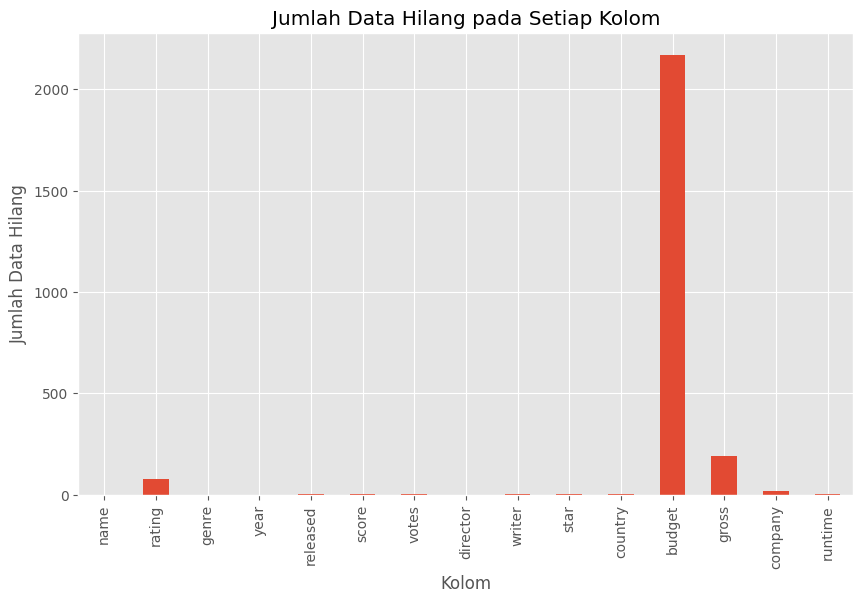

In [ ]:
#mencari data hilang
kolom_dgn_data_hilang = df.columns[df.isnull().any()]
jumlah_data_hilang = df.isnull().sum()
total_data_hilang = df.isnull().sum().sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind='bar')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Hilang')
plt.title('Jumlah Data Hilang pada Setiap Kolom')
plt.show()


In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [63]:
#Change data type of kolom
df['gross'] = df['gross'].fillna(0)  # Mengisi nilai non-finite dengan nol
df['gross'] = df['gross'].astype(int)

df['budget'] = df['budget'].fillna(0)  # Mengisi nilai non-finite dengan nol
df['budget'] = df['budget'].astype(int)

df['gross'] = df['gross'].astype(int)
df['budget'] = df['budget'].astype(int)

df.head(15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [ ]:
df = df.drop('year', axis=1)


In [64]:
#create correct yar coloumn

df['year'] = df['released'].str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
#mengubah year menjadi integer
df['year'] = df['year'].fillna(0)  # Mengisi nilai non-finite dengan nol
df['year'] = df['year'].astype(int)
df['year'] = df['year'].astype(int)

In [ ]:
df.describe()


,score,votes,budget,gross,runtime
count,7665.000000,7.665000e+03,7.668000e+03,7.668000e+03,7664.000000
mean,6.390411,8.810850e+04,2.551350e+07,7.656567e+07,107.261613
std,0.968842,1.633238e+05,3.858954e+07,1.641217e+08,18.581247
min,1.900000,7.000000e+00,0.000000e+00,0.000000e+00,55.000000
25%,5.800000,9.100000e+03,0.000000e+00,3.860582e+06,95.000000
50%,6.500000,3.300000e+04,1.200000e+07,1.895543e+07,104.000000
75%,7.100000,9.300000e+04,3.200000e+07,7.262022e+07,116.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [65]:
#mengurutkan data dari gross tertinggi
df.sort_values('gross', ascending=False, inplace=False)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


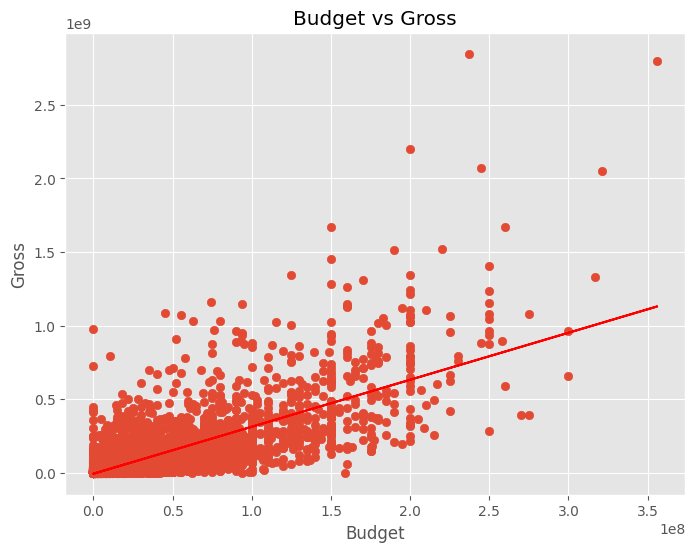

In [ ]:
#budget high correlation
#company high correlation

plt.figure(figsize=(8, 6))  # Mengatur ukuran plot menjadi 8x6 inch
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')

# Menambahkan garis korelasi
z = np.polyfit(df['budget'], df['gross'], 1)
p = np.poly1d(z)
plt.plot(df['budget'], p(df['budget']), color='red')

plt.show()



# Bagian Baru

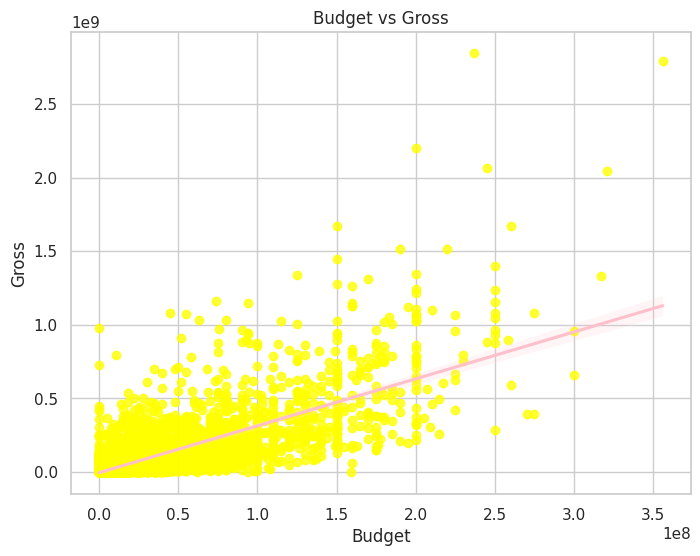

In [ ]:
#regression plot seaborn

plt.figure (figsize = (8, 6))
sns.regplot(data=df, x='budget', y='gross', color='pink', scatter_kws={'color': 'yellow'})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')
plt.show()



#let start looking the correlation

In [ ]:
df.corr('pearson') #pearson, kendall, spearman

<ipython-input-61-e36ba0813a42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('pearson') #pearson, kendall, spearman


,score,votes,budget,gross,runtime,year
score,1.000000,0.409182,0.055665,0.186392,0.399451,0.045473
votes,0.409182,1.000000,0.486862,0.632834,0.309212,0.070314
budget,0.055665,0.486862,1.000000,0.750157,0.269510,0.108069
gross,0.186392,0.632834,0.750157,1.000000,0.245235,0.090394
runtime,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
year,0.045473,0.070314,0.108069,0.090394,0.120636,1.000000


In [ ]:
df.corr(method ='kendall')

In [ ]:
df.corr(method ='spearman')

<ipython-input-5-3358166fa928>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method = 'pearson')


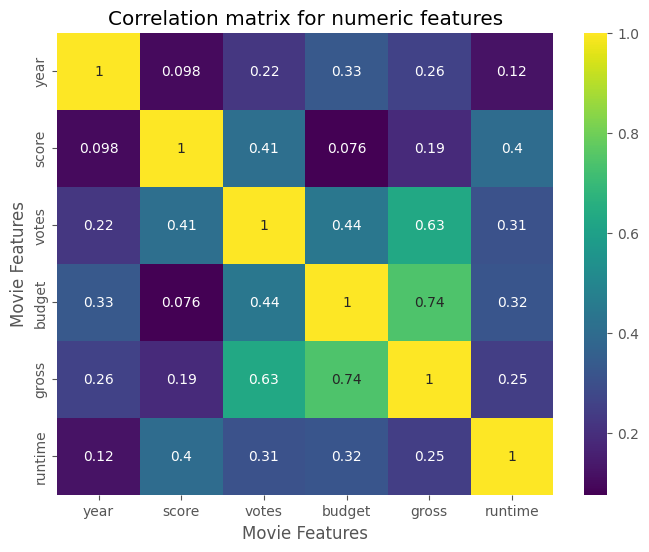

In [5]:
#High Correlation between buudget and gross
corr_matrix = df.corr(method = 'pearson')

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [66]:
##Company is not numeric, make it all numeric
df_numerized = df

for col_name in df_numerized.columns:
  if df_numerized[col_name].dtype == 'object':
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,0,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,0,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,0,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,0,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


In [9]:
#Company is not numeric, make it all numeric
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


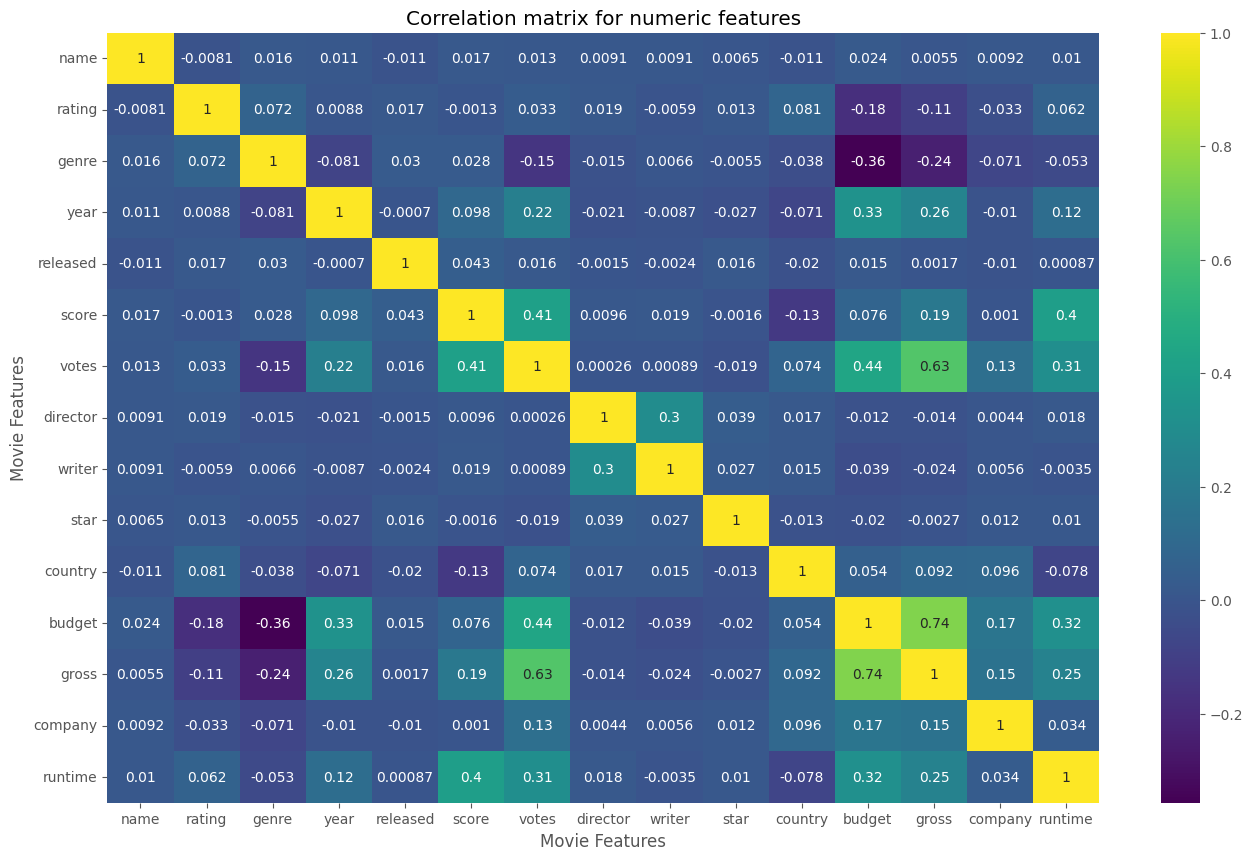

In [39]:
corr_matrix = df_numerized.corr(method = 'pearson')

plt.figure(figsize = (16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
print (corr_pairs)

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64


In [49]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [50]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [56]:
# Menghitung total gross berdasarkan perusahaan
total_gross_per_company = df.groupby('company')['gross'].sum()

# Mengurutkan total gross secara menurun
sorted_total_gross = total_gross_per_company.sort_values(ascending=False)

# Mengambil 15 perusahaan dengan total gross tertinggi
top_15_companies = sorted_total_gross.head(15)

# Mengubah tipe data menjadi integer
top_15_companies = top_15_companies.astype(int)

# Menampilkan total gross dari setiap perusahaan
print(top_15_companies)


company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64


In [57]:
# Mengubah kolom 'year' menjadi string
df['year'] = df['year'].astype(str)

# Menampilkan tabel dengan kolom 'year' sebagai tipe data string
print(df)


                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released 

In [59]:
# Menghitung total gross berdasarkan perusahaan dan tahun
total_gross_per_company_year = df.groupby(['company', 'year'])['gross'].sum()

# Mengurutkan total gross secara menurun
sorted_total_gross = total_gross_per_company_year.sort_values(ascending=False)

# Mengambil total gross tertinggi
highest_total_gross = sorted_total_gross.head(15)

# Menampilkan total gross tertinggi
print(highest_total_gross)


company                year
Walt Disney Pictures   2019    5.773132e+09
Marvel Studios         2018    4.018632e+09
Universal Pictures     2015    3.834355e+09
Twentieth Century Fox  2009    3.793491e+09
Walt Disney Pictures   2017    3.789382e+09
Paramount Pictures     2011    3.565705e+09
Warner Bros.           2010    3.300480e+09
                       2011    3.223799e+09
Walt Disney Pictures   2010    3.104474e+09
Paramount Pictures     2014    3.071299e+09
Columbia Pictures      2006    2.934632e+09
                       2019    2.932757e+09
Marvel Studios         2019    2.797501e+09
Warner Bros.           2018    2.774169e+09
Columbia Pictures      2011    2.738363e+09
Name: gross, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.9% of the points cannot be plac

<Axes: xlabel='rating', ylabel='gross'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


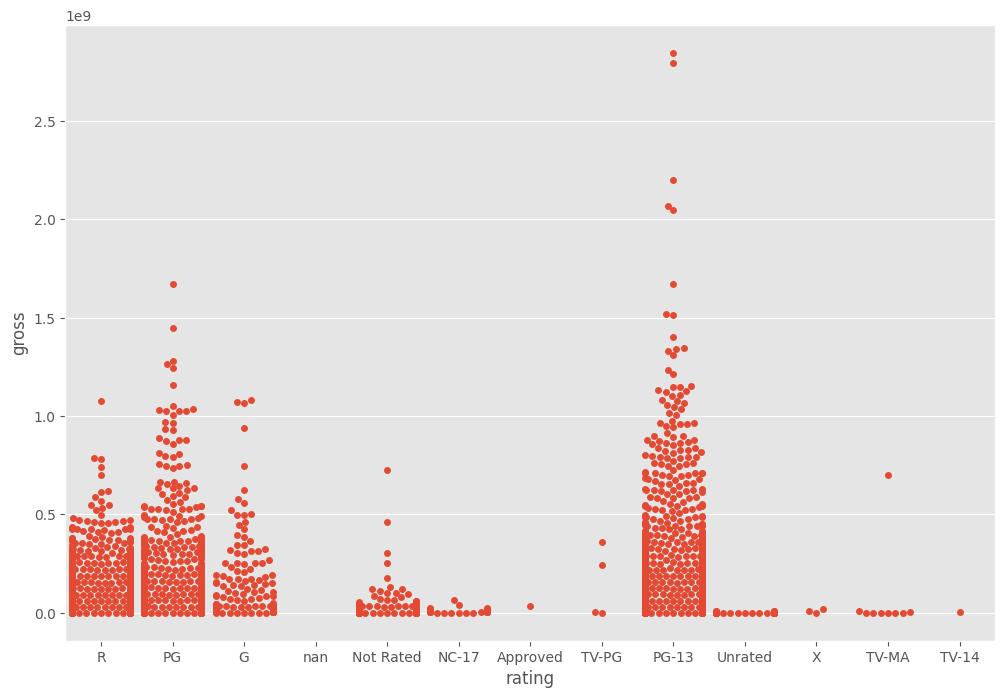

In [61]:
sns.swarmplot(x="rating", y="gross", data=df)

<Axes: xlabel='rating', ylabel='gross'>

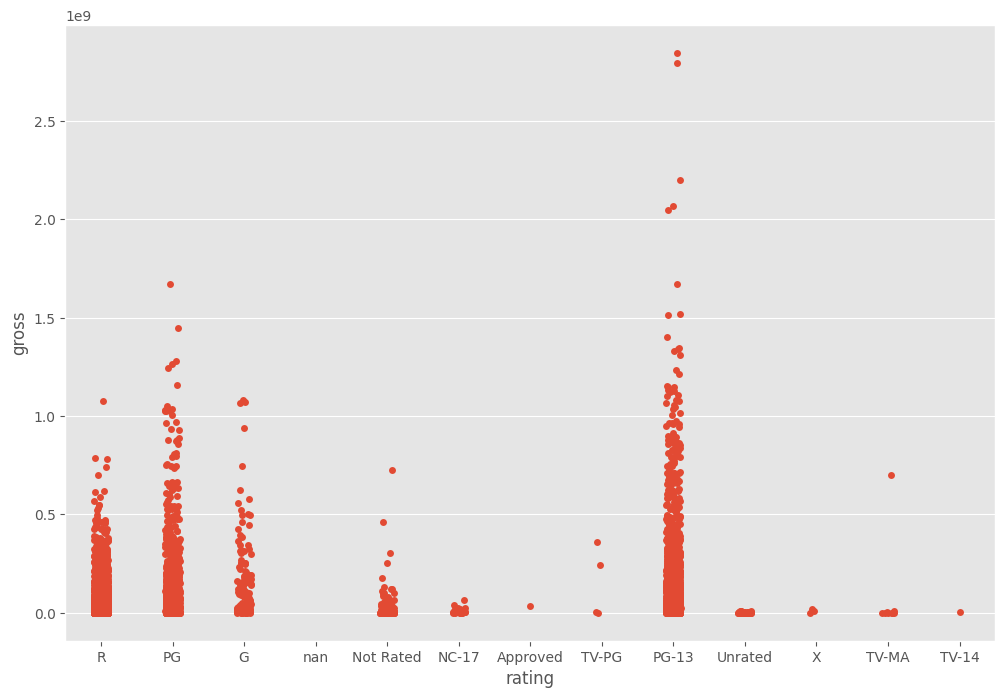

In [62]:
sns.stripplot(x="rating", y="gross", data=df)